# Prosper Loan Data Exploration
## by Joseph Edet

## Introduction
    Exploration of a data set from a peer-to-peer credit online marketplace **Prosper Funding LLC** which contains information about loan listings and variables including borrower and lender information.  



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Load the dataset
df = pd.read_csv('prosperLoanData.csv')

In [3]:
# View the numbers of rows and columns in the dataset
df.shape

(113937, 81)

In [4]:
# Look at the first 5 rows of the dataset
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [6]:
# Statistical overview
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


### What is the structure of your dataset?

The dataset has 113,937 rows and 81 columns

### What is/are the main feature(s) of interest in your dataset?

My main interest is finding out what factors might affect the Borrower's Annual Percentage Rate (APR).

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Some features I suspect should have an influence on the Borrower's APR include: Prosper score, loan term, Debt-to-income ratio, employment status (and probably occupation), the borrower's income, credit score, stated purpose for obtaining the loan, delinquent payments and also the principal

#### Variable Definitions
- ListingKey - The number that uniquely identifies the listing to the public as displayed on the website
- Term - The length of the loan expressed in months
- BorrowerAPR - The Borrower's Annual Percentage Rate (APR) for the loan
- ProsperScore - A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score
- Occupation - The Occupation selected by the Borrower at the time they created the listing
- CreditScoreRangeLower - The lower value representing the range of the borrower's credit score as provided by a consumer credit rating agency.
- CreditScoreRangeUpper - The upper value representing the range of the borrower's credit score as provided by a consumer credit rating agency.
- DebtToIncomeRatio - The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%)
- IncomeRange - The income range of the borrower at the time the listing was created.
- IsBorrowerHomeowner - A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.
- LoanOriginalAmount - The origination amount of the loan
- IncomeVerifiable - The borrower indicated they have the required documentation to support their income.
- EmploymentStatus - The employment status of the borrower at the time they posted the listing

_____

Create a subset of the dataset with containing only my variables of interest

In [7]:
sub_cols = ['ListingKey','Term','BorrowerAPR','ProsperScore','Occupation',
           'DebtToIncomeRatio','IncomeRange','IsBorrowerHomeowner',
           'LoanOriginalAmount','IncomeVerifiable','EmploymentStatus']

In [8]:
df_sub = df[sub_cols]
df_sub.head()

,ListingKey,Term,BorrowerAPR,ProsperScore,Occupation,DebtToIncomeRatio,IncomeRange,IsBorrowerHomeowner,LoanOriginalAmount,IncomeVerifiable,EmploymentStatus
0,1021339766868145413AB3B,36,0.16516,NaN,Other,0.17,"$25,000-49,999",True,9425,True,Self-employed
1,10273602499503308B223C1,36,0.12016,7.0,Professional,0.18,"$50,000-74,999",False,10000,True,Employed
2,0EE9337825851032864889A,36,0.28269,NaN,Other,0.06,Not displayed,False,3001,True,Not available
3,0EF5356002482715299901A,36,0.12528,9.0,Skilled Labor,0.15,"$25,000-49,999",True,10000,True,Employed
4,0F023589499656230C5E3E2,36,0.24614,4.0,Executive,0.26,"$100,000+",True,15000,True,Employed


Exploring the sub-dataset

In [9]:
# Check for null values
df_sub.isnull().sum()

ListingKey                 0
Term                       0
BorrowerAPR               25
ProsperScore           29084
Occupation              3588
DebtToIncomeRatio       8554
IncomeRange                0
IsBorrowerHomeowner        0
LoanOriginalAmount         0
IncomeVerifiable           0
EmploymentStatus        2255
dtype: int64

Our variable of interest has 25 null values and these will be dropped

In [10]:
df_sub.dropna(subset=['BorrowerAPR'], inplace=True)

In [11]:
# Check for duplicates in the whole dataset
df_sub.duplicated().sum()

0

## Univariate Exploration

### Borrower APR

I'll begin by looking at the distribution of my main variable of interest - `BorrowerAPR`. 

How are the values in BorrowerAPR distributed?

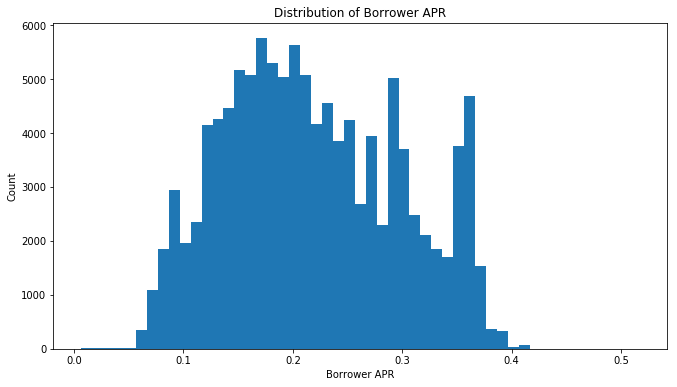

In [12]:
bins = np.arange(df_sub['BorrowerAPR'].min(), df_sub['BorrowerAPR'].max()+0.01, 0.01)
plt.figure(figsize=(11,6))
plt.hist(data=df_sub, x='BorrowerAPR', bins=bins)
plt.xlabel('Borrower APR')
plt.ylabel('Count')
plt.title('Distribution of Borrower APR');

The distrubution of BorrowerAPR column is multimodal with the highest peaks between 0.1 and 0.2

### Employment Status

Next I'll look at the `EmploymentStatus` variable to see how the categories are distributed

In [13]:
df_sub['EmploymentStatus']

0         Self-employed
1              Employed
2         Not available
3              Employed
4              Employed
5              Employed
6              Employed
7              Employed
8              Employed
9              Employed
10             Employed
11            Full-time
12             Employed
13             Employed
14             Employed
15                Other
16            Full-time
17        Not available
18             Employed
19             Employed
20             Employed
21            Full-time
22                Other
23             Employed
24             Employed
25             Employed
26             Employed
27            Full-time
28             Employed
29             Employed
              ...      
113906        Full-time
113907         Employed
113908         Employed
113909         Employed
113910         Employed
113911         Employed
113912         Employed
113913        Full-time
113914              NaN
113915        Full-time
113916         E

In [14]:
df_sub['EmploymentStatus'].unique()

array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       nan, 'Not employed', 'Part-time', 'Retired'], dtype=object)

In [15]:
# order the bars
order = df_sub['EmploymentStatus'].value_counts().index
# change to categorical data type
ordered_emp = pd.api.types.CategoricalDtype(ordered=True, categories=order)
df_sub['EmploymentStatus'] = df_sub['EmploymentStatus'].astype(ordered_emp)

In [16]:
df_sub['EmploymentStatus'].dtype

CategoricalDtype(categories=['Employed', 'Full-time', 'Self-employed', 'Not available',
                  'Other', 'Part-time', 'Not employed', 'Retired'],
                 ordered=True)

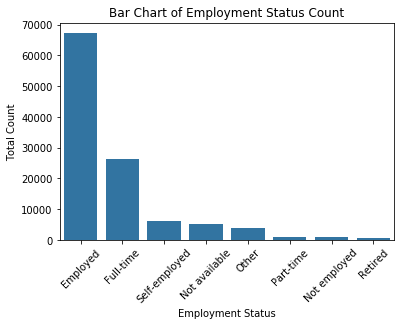

In [17]:
base_color = sns.color_palette()[0]

# plot the data
sns.countplot(data = df_sub, x = 'EmploymentStatus', color = base_color)
plt.xticks(rotation = 45)
plt.title('Bar Chart of Employment Status Count')
plt.xlabel('Employment Status')
plt.ylabel('Total Count');

The top category of borrowers are Employed, followed by Full-time, then Self-employed which means most borrowers have a means of making money, therefore have means of repaying their debt.

### Occupation

Now I'll take a look at the most popular occupations of the borrowers. I'm interested in what the borrowers do for a living as that might influence APR

In [18]:
df_sub['Occupation']

0                           Other
1                    Professional
2                           Other
3                   Skilled Labor
4                       Executive
5                    Professional
6                  Sales - Retail
7                         Laborer
8                    Food Service
9                    Food Service
10                        Fireman
11                Waiter/Waitress
12                 Sales - Retail
13                   Construction
14            Computer Programmer
15                          Other
16                   Professional
17                   Professional
18             Sales - Commission
19                        Laborer
20              Retail Management
21                   Professional
22                          Other
23                  Skilled Labor
24                          Other
25          Engineer - Mechanical
26             Sales - Commission
27                      Executive
28              Military Enlisted
29            

In [19]:
df_sub['Occupation'].nunique()

67

I thought of plotting a bar chart since the Occupation column is a categorical variable, but 67 unique values will look messy in a bar chart. So I'm opting for a word cloud instead

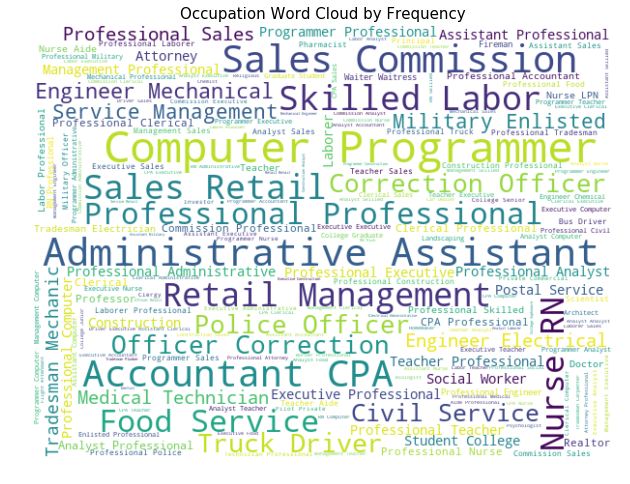

In [20]:
# Import libraries needed for a word cloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

# remove redundant stopwords
stopwords = set(STOPWORDS)

text = df_sub.loc[:, 'Occupation'].str.cat(others=None, sep=' ')

# Instantiate a Word Cloud object
wc = WordCloud(background_color='white', max_words=300, stopwords=stopwords,  width=600, height=450)

# Generate word cloud
wc.generate(text)

# Show word cloud
plt.figure(figsize=(14,8))
plt.imshow(wc, interpolation='bilinear')
plt.title('Occupation Word Cloud by Frequency', fontsize=15)
plt.axis('off');

Looking at the word cloud, the most popular professions are Professional, Computer Programmer, Administrative Assistant, Analyst, Executive, Teacher - jobs with reasonable pay in the U.S

### Prosper Score

I'll also look at the ProsperScore column. I assume borrowers with higher Prosper score are more trusted by the company, hence will have lower APR

In [21]:
df_sub['ProsperScore']

0          NaN
1          7.0
2          NaN
3          9.0
4          4.0
5         10.0
6          2.0
7          4.0
8          9.0
9         11.0
10         7.0
11         NaN
12         4.0
13         8.0
14         8.0
15         5.0
16         4.0
17         NaN
18         7.0
19         8.0
20         7.0
21         NaN
22         2.0
23         5.0
24         5.0
25         3.0
26         3.0
27         9.0
28         4.0
29         6.0
          ... 
113906     NaN
113907     2.0
113908     5.0
113909     7.0
113910     2.0
113911     3.0
113912    11.0
113913     9.0
113914     NaN
113915     NaN
113916     6.0
113917     2.0
113918     NaN
113919     3.0
113920     2.0
113922     NaN
113923     NaN
113924     8.0
113925     2.0
113926     NaN
113927     NaN
113928     6.0
113929     3.0
113930     6.0
113931     6.0
113932     5.0
113933     8.0
113934     3.0
113935     5.0
113936     7.0
Name: ProsperScore, Length: 113912, dtype: float64

In [22]:
df_sub['ProsperScore'].describe()

count    84853.000000
mean         5.950067
std          2.376501
min          1.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         11.000000
Name: ProsperScore, dtype: float64

In [23]:
df_sub['ProsperScore'].unique()

array([ nan,   7.,   9.,   4.,  10.,   2.,  11.,   8.,   5.,   3.,   6.,
         1.])

It looks like it's a categorical variable - Ordinal variable taking values from 1 to 11. I'll plot a bar chart to see the count for each Prosper score

In [24]:
# order the bars
order = [1,2,3,4,5,6,7,8,9,10,11]
# change data type to Categorical
ordered_data = pd.api.types.CategoricalDtype(ordered=True, categories=order)
df_sub['ProsperScore'] = df_sub['ProsperScore'].astype(ordered_data)

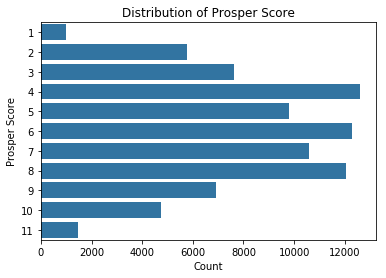

In [25]:
# Plot a bar chart
sns.countplot(data=df_sub, y='ProsperScore', order=order, color=base_color)
plt.ylabel('Prosper Score')
plt.xlabel('Count')
plt.title('Distribution of Prosper Score');

Looking at the length of the bars, the most popular Prosper Score is 4, closely followed by 6 then 8. It looks like the differences between the top 3 Prosper scores isn't much

### Debt To Income Ratio

Debt-to-income ratio is the sum of debt obligations divided by gross income. I suspect this variable should have influence APR.

In [26]:
df_sub['DebtToIncomeRatio'].describe()

count    105358.000000
mean          0.275993
std           0.551814
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

The 75th percentile is 0.32 but the max is >10. This distribution should have unusual outliers. I'll plot a boxplot to see the outliers

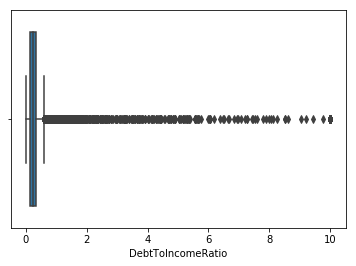

In [27]:
sns.boxplot(data=df_sub, x='DebtToIncomeRatio');

wow! So many outliers in the high end, which should represent borrowers with debt-to-income ratio greater than 1

Debt-to-income ratio should be expressed in percentage but it is expressed as ratio in this dataset, which means every entry with values from 0 to less than 1 have ratios less than 100%. While values greater than one have ratios more than 100% and these people borrow more than they earn. I'll split this variable into these 2 groups and see how each group is distributed

In [28]:
less_than_100 = df_sub.query('DebtToIncomeRatio <= 1')
greater_than_100 = df_sub.query('DebtToIncomeRatio > 1')

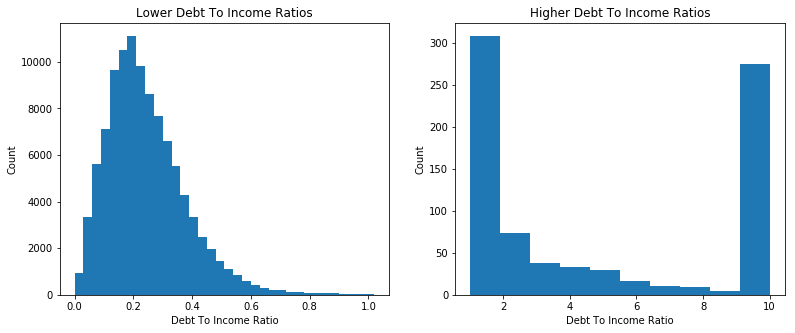

In [29]:
plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
bins = np.arange(0, less_than_100['DebtToIncomeRatio'].max()+0.03, 0.03)
plt.hist(data=less_than_100, x='DebtToIncomeRatio', bins=bins)
plt.xlabel('Debt To Income Ratio')
plt.ylabel('Count')
plt.title('Lower Debt To Income Ratios');

plt.subplot(1,2,2)
bins = np.arange(greater_than_100['DebtToIncomeRatio'].min(), greater_than_100['DebtToIncomeRatio'].max()+0.9, 0.9)
plt.hist(data=greater_than_100, x='DebtToIncomeRatio', bins=bins)
plt.xlabel('Debt To Income Ratio')
plt.ylabel('Count')
plt.title('Higher Debt To Income Ratios');

On the lower side, distribution is right skewed as most borrowers here have lower debt-to-income ratios and the mode is around the 20% mark. According to this article by [Chase Bank](https://www.chase.com/personal/credit-cards/education/basics/what-is-debt-to-income-ratio-and-why-it-is-important#:~:text=Debt%2Dto%2Dincome%20ratio%20of,loan%20or%20line%20of%20credit.), a healthy debt-to-income ratio should be aroound 36% or less. So what percentage of our borrowers have a healthy debt-to-income ratio?

On the higher side, the distribution is bimodal and the modes are on both ends

In [30]:
# Percentage of borrowers with healthy debt-to-income ratio
healthy = len(df_sub.query('DebtToIncomeRatio <= 0.36'))
healthy_percentage = (healthy / len(df_sub)) * 100
healthy_percentage

77.33601376501159

The percentage of our borrowers with a healthy debt-to-income ratio is 77.3% which is good, and also more than I expected

### Income Range

In [31]:
df_sub['IncomeRange']

0         $25,000-49,999
1         $50,000-74,999
2          Not displayed
3         $25,000-49,999
4              $100,000+
5              $100,000+
6         $25,000-49,999
7         $25,000-49,999
8         $25,000-49,999
9         $25,000-49,999
10        $75,000-99,999
11             $1-24,999
12        $25,000-49,999
13        $50,000-74,999
14             $100,000+
15        $50,000-74,999
16        $75,000-99,999
17         Not displayed
18        $75,000-99,999
19        $25,000-49,999
20        $50,000-74,999
21        $25,000-49,999
22             $1-24,999
23        $25,000-49,999
24        $25,000-49,999
25        $75,000-99,999
26        $25,000-49,999
27        $75,000-99,999
28        $25,000-49,999
29             $100,000+
               ...      
113906    $50,000-74,999
113907    $25,000-49,999
113908    $25,000-49,999
113909    $25,000-49,999
113910         $100,000+
113911    $25,000-49,999
113912    $25,000-49,999
113913         $100,000+
113914     Not displayed


In [32]:
df_sub['IncomeRange'].unique()

array(['$25,000-49,999', '$50,000-74,999', 'Not displayed', '$100,000+',
       '$75,000-99,999', '$1-24,999', 'Not employed', '$0'], dtype=object)

In [33]:
df_sub['IncomeRange'].isnull().sum()

0

To make a better visual, I will group 'Not displayed' and 'Not employed' to '$0'

In [34]:
df_sub['IncomeRange'].replace(['Not employed', 'Not displayed'], '$0', inplace = True)

In [35]:
# Create ordinal categories of Income Range
order = ['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999', '$1-24,999', '$0']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = order)
df_sub['IncomeRange'] = df_sub['IncomeRange'].astype(ordered_var)

In [36]:
df_sub['IncomeRange'].dtype

CategoricalDtype(categories=['$100,000+', '$75,000-99,999', '$50,000-74,999',
                  '$25,000-49,999', '$1-24,999', '$0'],
                 ordered=True)

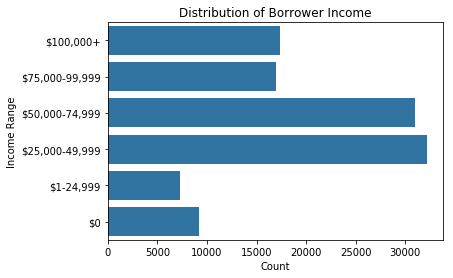

In [37]:
# Plot a bar chart
sns.countplot(data = df_sub, y = 'IncomeRange', color = base_color)
plt.ylabel('Income Range')
plt.xlabel('Count')
plt.title('Distribution of Borrower Income');

Most borrowers earn between 25,000 to 49,000. It's interesting that the value for the 50,000-74,999 range is also similar and also the top 2 highest ranges in the variable are similar, depicted by the length of the bars

### Income Verifiable

Now we've looked at Income Range, let's see the distribution of borrowers who have documentation to support their stated income

In [38]:
df_sub['IncomeVerifiable'].head()

0    True
1    True
2    True
3    True
4    True
Name: IncomeVerifiable, dtype: bool

The variable is of boolean datatype, plotting the distribution using a pie chart will be appropriate

In [43]:
# There are quite a few categorical variables in the dataset.
# I'll create a function to plot a pie chart. This avoids code repitition
def plot_pie(col):
    """Plot a pie chart of a categorical variable"""
    sorted_counts = df_sub[col].value_counts()
    plt.pie(sorted_counts, labels=list(df_sub[col].unique()), startangle=90, autopct='%.1f%%', counterclock=False)
    plt.title(f"Pie Chart of {str(df_sub[col].name)}")

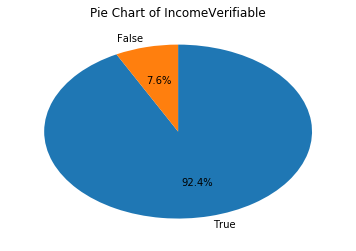

In [44]:
plot_pie('IncomeVerifiable')

A much larger percentage of borrowers (92.4%) have documentation to support their stated income, while 7.6% don't.

### Loan Term

In [45]:
df_sub['Term'].unique()

array([36, 60, 12])

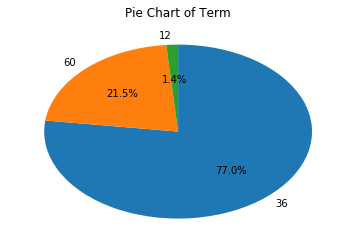

In [46]:
plot_pie('Term')

The most popular length of loans are medium term loans (36 months) at 77% while the least popular are short term loans (12 months) at just 1.4%

### Loan Original Amount

How is the original loan principal distributed?

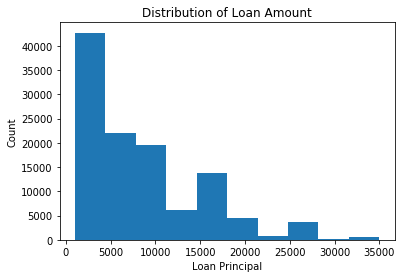

In [47]:
plt.hist(data=df_sub, x='LoanOriginalAmount')
plt.xlabel('Loan Principal')
plt.ylabel('Count')
plt.title('Distribution of Loan Amount');

The distribution of loan amount is very right-skewed. Most loan principals are less than or equal to $10,000. Generally as the money increases, the distribution drops off.

### IsBorrowerHomeowner

In [48]:
df_sub['IsBorrowerHomeowner'].head()

0     True
1    False
2    False
3     True
4     True
Name: IsBorrowerHomeowner, dtype: bool

This variable is of boolean data type and the distribution will be easy to see in a pie chart

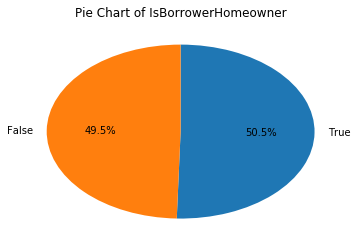

In [49]:
plot_pie('IsBorrowerHomeowner')

The divide between the two groups is almost equal. Home owners are more than non-home owners but just by 1%, a close margin.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of BorrowerAPR is multimodal with the highest peaks around the 0.2 (20%) mark. I did not need to perform any transformations.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- It was shocking to see unusually high debt-to-income ratios. I mean people shouldn't take out high loans regularly if they don't earn as much.
- Also it was interesting to see similar values for income ranges between 25,000 to 49,000 and 50,000-74,999.
- I would have thought short term loans (12 months) would be more popular because humans usually have urgent needs and most people (including me) do not like owing for too long but to my shock, short term loans represent just 1.4% of the dataset
- In the `IncomeRange` column, to create a better visual, I grouped 'Not Displayed' and 'Not Employed' to $0

## Bivariate Exploration

###  Borrower APR vs Income Range

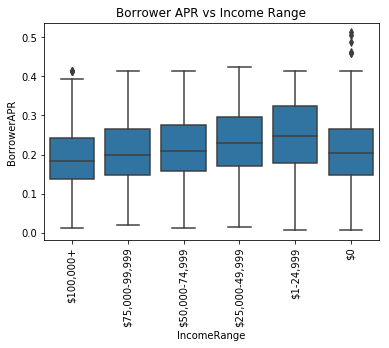

In [51]:
sns.boxplot(data=df_sub, x='IncomeRange', y='BorrowerAPR', color=base_color)
plt.xticks(rotation=90)
plt.title('Borrower APR vs Income Range');

There is a negative correlation between Income Range and Borrower APR. The boxplot shows that low income is associated with higher APRs which suggests that obtaining a loan costs more if you earn low

### Borrower APR vs Employment Status

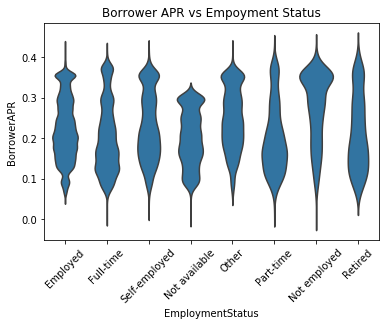

In [52]:
sns.violinplot(data=df_sub, x='EmploymentStatus', y='BorrowerAPR', inner=None, color=base_color)
plt.xticks(rotation= 45)
plt.title('Borrower APR vs Empoyment Status');

This violinplot suggests unemployed borrowers are charged with higher Annual Percentage Rates when they take out loans. 
Interesting looking at the plot of the Part-time category with a rather reasonable distribution of values around 0.1

### BorrowerAPR vs Term

Does the length of the loan influence APR?

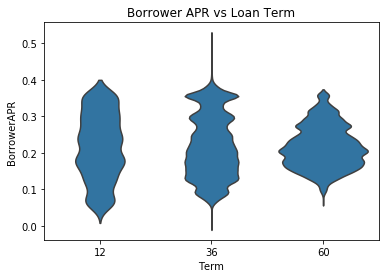

In [53]:
sns.violinplot(data=df_sub, x='Term', y='BorrowerAPR', inner=None, color=base_color)
plt.title('Borrower APR vs Loan Term');

Difficult to interpret this. But it doesn't look like the loan term influences APR much. But interestingly for the 60-month loan term, there is a rather large distribution of values around the 0.2 mark

### Borrower APR vs DebtToIncomeRatio

I believe having a higher debt-to-income ratio should influence APR. I should gain more insight by plotting some visualizations

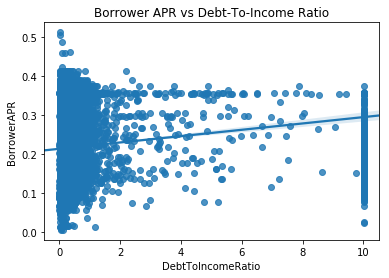

In [54]:
sns.regplot(data=df_sub, x='DebtToIncomeRatio', y='BorrowerAPR')
plt.title('Borrower APR vs Debt-To-Income Ratio');

The scatterplot shows a positive correlation between Borrower APR and Debt-to-Income ratio, although the correlation is not strong. The cost of taking a loan is higher for borrowers with higher debt-to-income ratios.

I'm interested in seeing the mean values of DBI for the two groups

In [55]:
print(f"The Mean value for lower group is {less_than_100['BorrowerAPR'].mean()}")
print(f"The Mean value for higher group is {greater_than_100['BorrowerAPR'].mean()}")      

The Mean value for lower group is 0.21599871345364818
The Mean value for higher group is 0.24797028785982475


The mean APR for borrowers whose debt-to-income ratio is greater than 100% is higher than the mean APR for borrowers with debt-to-income ratios less than 100% but only slightly (by approximately 0.03)

### Borrower APR vs Loan Original Amount

Does the principal influence the APR?

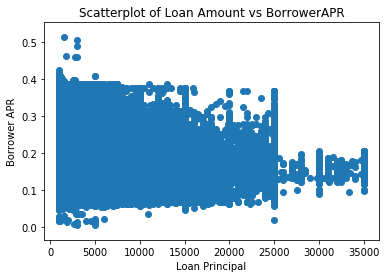

In [56]:
plt.scatter(data=df_sub, x='LoanOriginalAmount', y='BorrowerAPR')
plt.xlabel('Loan Principal')
plt.ylabel('Borrower APR')
plt.title('Scatterplot of Loan Amount vs BorrowerAPR');

Because of overplotting, the high overlap of points in the scatterplot makes it difficult to see the actual relationship between the plotted variables. I'll add some transparency to the plot and employ Seaborn's regplot() function to get a regression line

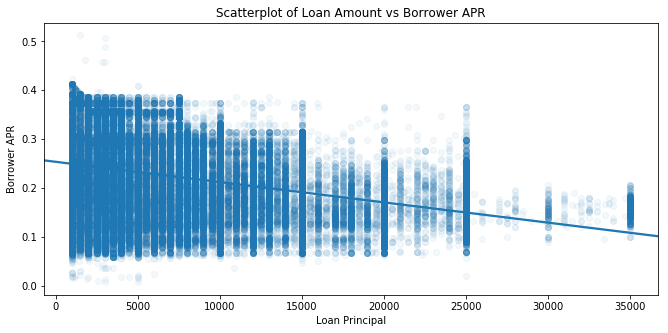

In [57]:
plt.figure(figsize=(11,5))
sns.regplot(data = df_sub, x='LoanOriginalAmount', y='BorrowerAPR', scatter_kws={'alpha':0.05})
plt.xlabel('Loan Principal')
plt.ylabel('Borrower APR')
plt.title('Scatterplot of Loan Amount vs Borrower APR');

The plot shows a negative regression line. There is a negative correlation between BorrowerAPR and LoanOriginalAmount which suggests low principal loans have higher rates than high principal loans. Well I would have thought since high principal loans pose more risk to the lenders, the APR would be relatively higher than low principal loans

### BorrowerAPR vs Prosper Score

Does Prosper score influence the cost of taking out a loan from the company?

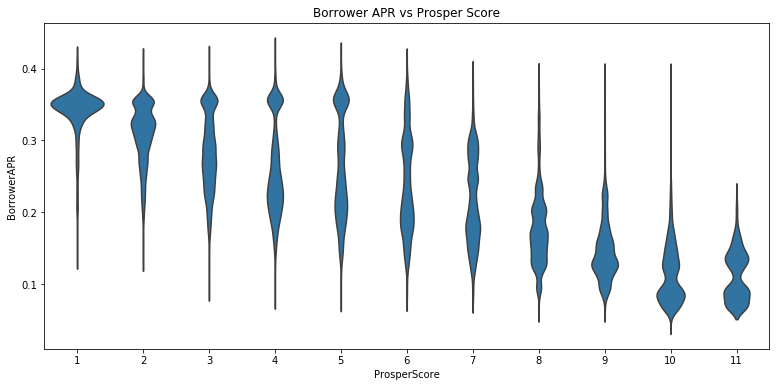

In [58]:
plt.figure(figsize=(13,6))
sns.violinplot(data=df_sub, x='ProsperScore', y='BorrowerAPR', inner=None, color=base_color)
plt.title('Borrower APR vs Prosper Score') ;

There is a strong negative correlation between ProsperScore and BorrowerAPR. Higher Prosper scores correlate with lower Annual Percentage Rates as seen by this violinplot. ProsperScore should be a measure of risk and trusthworthiness so this makes sense. The cost of taking a loan from Prosper would be cheaper if the company sees you as a trustworthy person and I assume this would be influenced by the the outcome of your loans in the past

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Low income range is associated with higher APR, also unemployed borrowers tend to have higher rates. Loan original amount negatively correlates with APR and loan term seems to have no influence on APR

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Since higher loans tends to pose higher risk for the lender, I expected loan original amount to positively correlate with BorrowerAPR but the reverse was the case

## Multivariate Exploration

### Borrower APR vs Income Range by IncomeVerifiable

How does having required documentation to support the stated income range of different borrowers influence APR

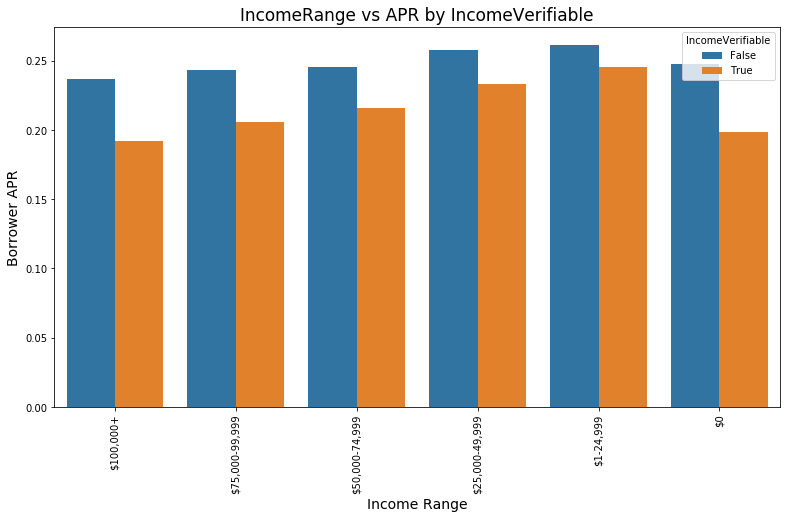

In [59]:
plt.figure(figsize=(13,7))
sns.barplot(data=df_sub, x='IncomeRange', y='BorrowerAPR', hue='IncomeVerifiable', ci=None)
plt.xlabel('Income Range', size=14)
plt.ylabel('Borrower APR', size=14)
plt.title('IncomeRange vs APR by IncomeVerifiable', size=17)
plt.xticks(rotation=90);

For every category, the borrowers who indicated that they do not have required documentation to support their stated income have higher APR on average than those who indicated that they do

### Income Range & APR vs Collateral

Does having a high income and a home (as a collateral) influence APR?

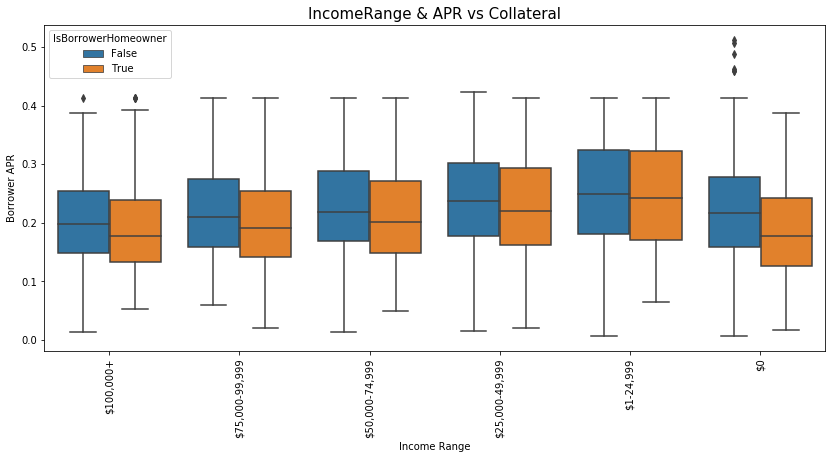

In [60]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df_sub,x='IncomeRange', y='BorrowerAPR', hue='IsBorrowerHomeowner')
plt.xlabel('Income Range')
plt.ylabel('Borrower APR')
plt.title('IncomeRange & APR vs Collateral', size=15)
plt.xticks(rotation=90);

The boxplot suggests that borrowers who don't have collateral are likely to get higher rates. But quite interestingly, having a home doesn't really influence low-income owners' APR. Looking at the $1-24,999 range of income, even though the group have the highest rates, the differences between home owners and non-home owners in terms of APR distribution isn't much. 

### Borrower APR vs Debt-to-Income Ratio by Prosper Score

Since Prosper score has the strongest correlation with APR, do borrowers with higher Prosper score get lower APRs despite their debt-to-income ratio?

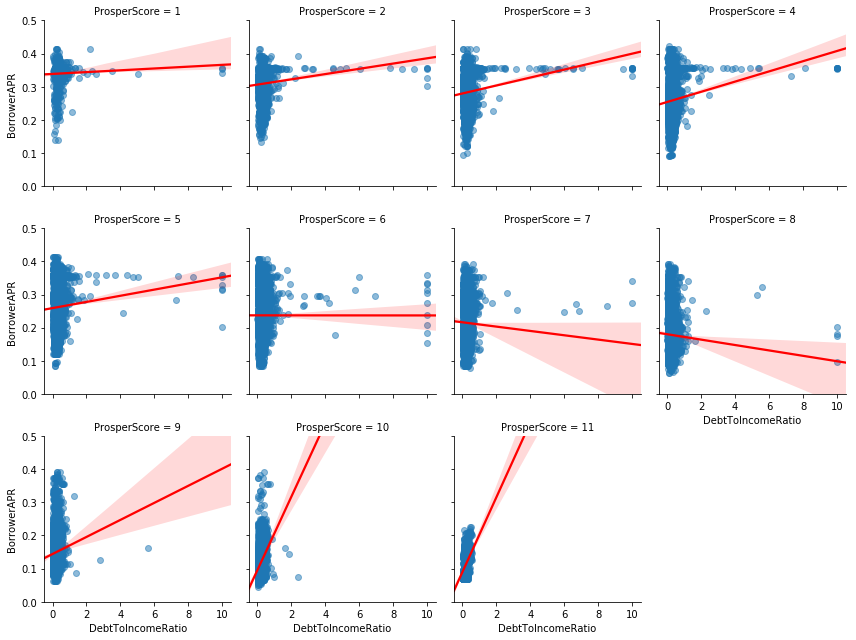

In [63]:
g = sns.FacetGrid(data=df_sub, col='ProsperScore', col_wrap=4, size=3)
g.map(sns.regplot, 'DebtToIncomeRatio', 'BorrowerAPR', scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
g.set(ylim=(0,0.5))
g.set_xlabels('DebtToIncomeRatio')
g.set_ylabels('BorrowerAPR')

plt.show()

As observed in the Facet grid, the regression line helped me make sense of the data. It might be a little hard to see but as the Prosper score gets higher, the intercept of the plots reduces. Each successive plot has a lower intercept, which indicates that on average, the relationship between APR and debt-to-income ratio reduces as the Prosper Score increases. This suggests that borrowers with higher Prosper score get lower APRs despite their debt-to-income ratio

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Having a high income and owning a home (which could be used as collateral) tends to be associated with lower APR


### Were there any interesting or surprising interactions between features?

> It was interesting to see that having a home doesn't really influence the APR of low-income borrowers which is illustrated by the size of the box of income range $1-24,999

## Conclusions
> From my investigation and explorations, I found out that the factors that affect Annual Percentage Rate of a borrower include Prosper Score, Employment status, the borrower owning a home, income range, debt-to-income ratio and the original amount of the loan.
